In [1]:
var openDigger = require('../src/open_digger');
var year = 2023, startMonth = 1, endMonth = 12, startYear = 2018
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2018, 2019, 2020, 2021, 2022]
var baseOptions = {
    startYear: year, endYear: year,
    startMonth, endMonth,
    groupTimeRange: 'year',
    order: 'DESC'
};

# 2023中国开源年度报告(AI领域)

## 生成式AI领域项目 OpenRank Top 10

此处给出数个生成式AI领域 2023 年度 OpenRank 指标 Top 10 项目及其自 2018 年起的 OpenRank 变化趋势。*

In [2]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/ai/generative_ai'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬────────────────────────────────────────┬─────────────┐
│ (index) │     id      │ platform │                  name                  │  openrank   │
├─────────┼─────────────┼──────────┼────────────────────────────────────────┼─────────────┤
│    0    │ '552661142' │ 'GitHub' │        'langchain-ai/langchain'        │ [ 6080.25 ] │
│    1    │ '155220641' │ 'GitHub' │       'huggingface/transformers'       │ [ 4422.84 ] │
│    2    │ '527591471' │ 'GitHub' │ 'AUTOMATIC1111/stable-diffusion-webui' │ [ 3881.6 ]  │
│    3    │ '614765452' │ 'GitHub' │     'Significant-Gravitas/AutoGPT'     │ [ 2664.85 ] │
│    4    │ '612354784' │ 'GitHub' │         'ggerganov/llama.cpp'          │ [ 2339.8 ]  │
│    5    │ '580642043' │ 'GitHub' │   'oobabooga/text-generation-webui'    │ [ 2242.5 ]  │
│    6    │ '208728772' │ 'GitHub' │           'milvus-io/milvus'           │ [ 2001.11 ] │
│    7    │ '560704231' │ 'GitHub' │        'run-llama/llama_index'         │ [ 

## 生成式AI领域项目 活跃度 Top 10

In [3]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':technology/ai/generative_ai'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬────────────────────────────────────────┬──────────────┬──────────────┬───────────────┬────────────┬────────────┬────────────────┬─────────────┬───────────┐
│ (index) │     id      │ platform │                  name                  │   activity   │ participants │ issue_comment │ open_issue │ open_pull  │ review_comment │ merged_pull │  details  │
├─────────┼─────────────┼──────────┼────────────────────────────────────────┼──────────────┼──────────────┼───────────────┼────────────┼────────────┼────────────────┼─────────────┼───────────┤
│    0    │ '552661142' │ 'GitHub' │        'langchain-ai/langchain'        │ [ 22563.04 ] │ [ '13068' ]  │  [ '32196' ]  │ [ '4851' ] │ [ '7732' ] │   [ '6693' ]   │ [ '5978' ]  │ undefined │
│    1    │ '527591471' │ 'GitHub' │ 'AUTOMATIC1111/stable-diffusion-webui' │ [ 13933.03 ] │ [ '11064' ]  │  [ '22481' ]  │ [ '3444' ] │ [ '1229' ] │   [ '192' ]    │  [ '828' ]  │ undefined │
│    2    │ '155220641' │ 'GitHub' 

## 生成式AI领域 OpenRank Top 10 项目近6年增长趋势

In [4]:
var startYear = 2018; year = 2023;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2018, 2019, 2020, 2021, 2023]

2023

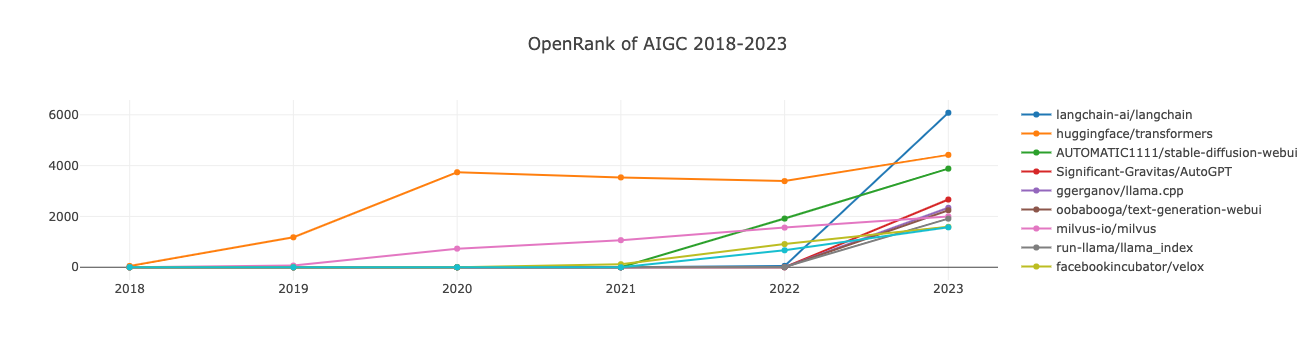

In [5]:
openDigger.index.openrank.getRepoOpenrank({
    startYear, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', order: 'DESC', labelIntersect: [':technology/ai/generative_ai'], limit: 10
}).then(data => {
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of AIGC 2018-2023`, xaxis: { type: 'category' }});
});

## 生成式AI领域 活跃度 Top 10 项目近6年增长趋势

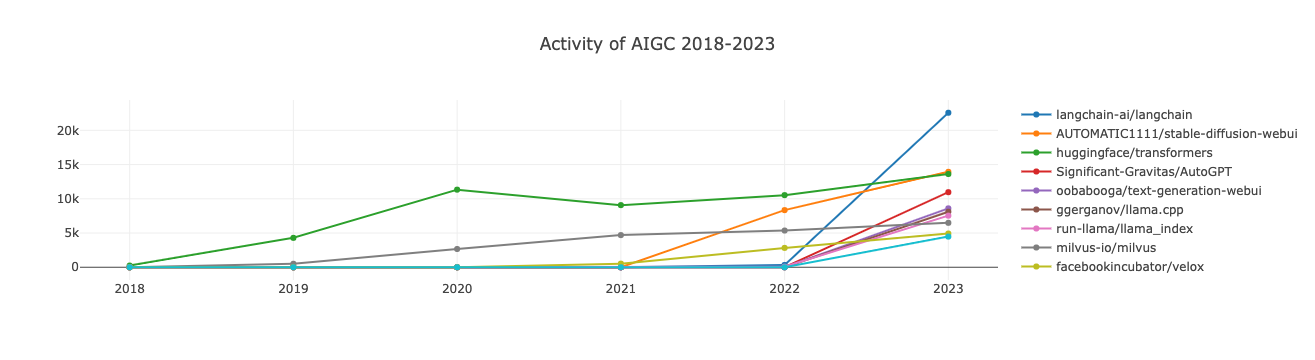

In [6]:
openDigger.index.activity.getRepoActivity({
    startYear, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', order: 'DESC', labelIntersect: [':technology/ai/generative_ai'], limit: 10
}).then(data => {
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.activity,
            name: row.name
        };
    }), {title: `Activity of AIGC 2018-2023`, xaxis: { type: 'category' }});
});

## 生成式AI各子领域近6年增长趋势

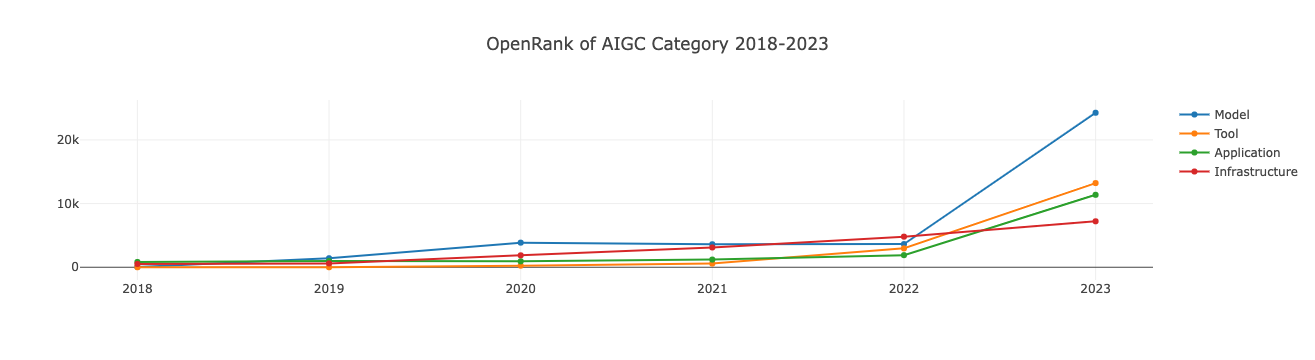

In [7]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology/ai/generative_ai'],
    startYear: 2018, endYear: 2023, endMonth: 12,
    groupBy: 'Tech-3',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology/ai/generative_ai'));
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of AIGC Category 2018-2023`, xaxis: { type: 'category' }});
})

### 技术领域项目分析

In [8]:
var processTechFieldData = (label, title) => {
    var years = [2018, 2019, 2020, 2021, 2022, 2023];
    openDigger.index.openrank.getRepoOpenrank({
        ...baseOptions, labelIntersect: [label], limit: 20, startYear: 2015,
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.openrank,
                name: row.name
            };
        }), {title: `OpenRank of ${title} 2018-2023`});
    });
};

### 大数据

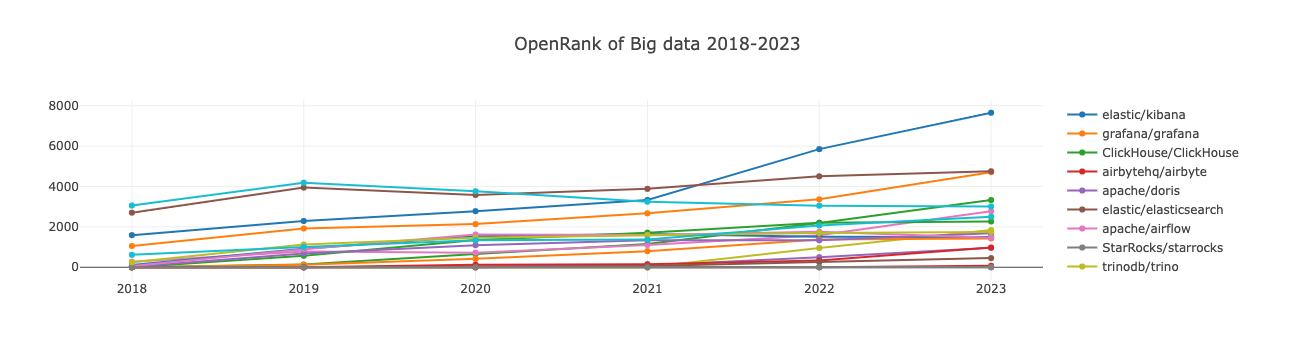

In [9]:
processTechFieldData(':technology/big_data', 'Big data');

### 数据库

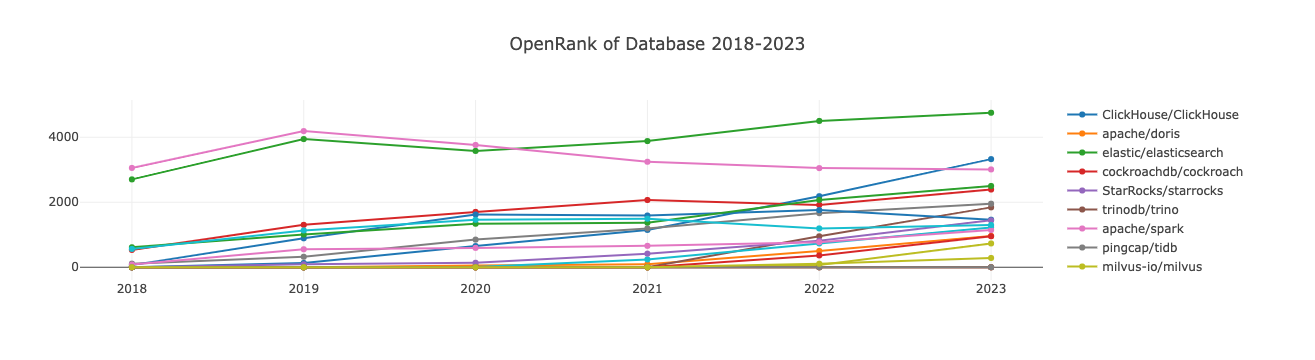

In [10]:
processTechFieldData(':technology/database', 'Database');

### 操作系统

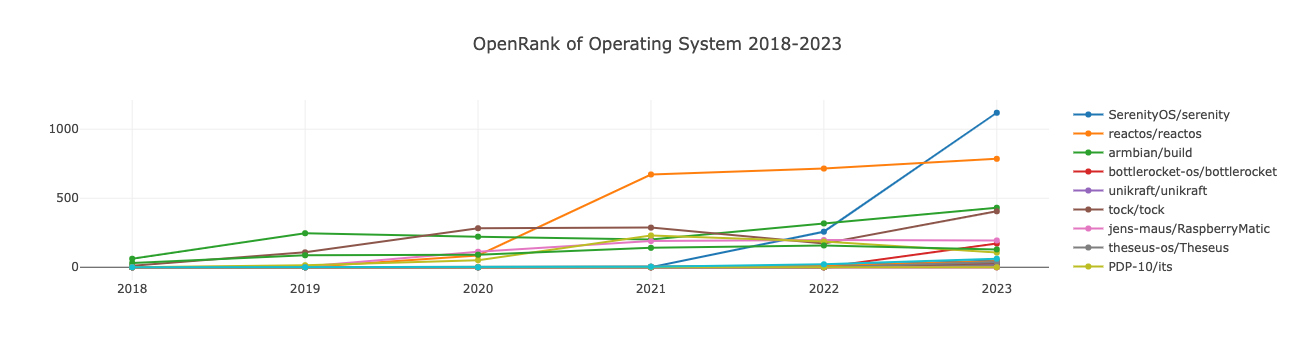

In [11]:
processTechFieldData(':technology/operating_system', 'Operating System');

### 云原生

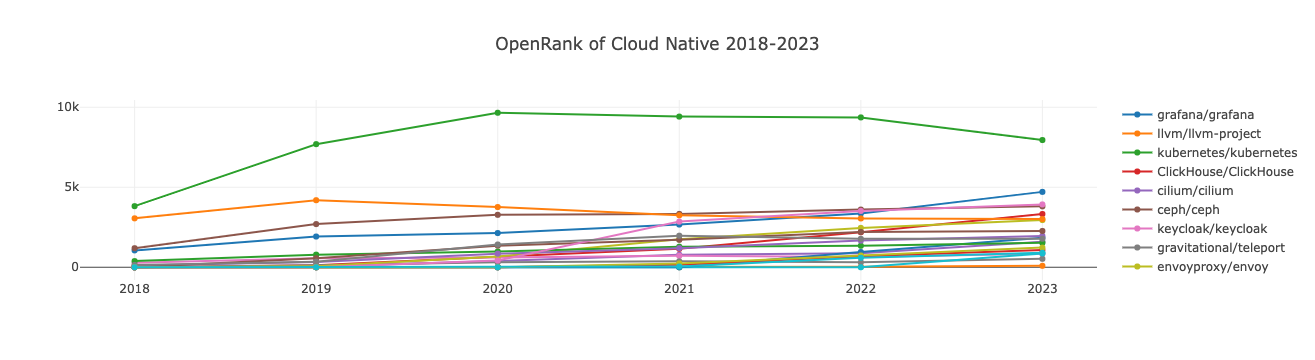

In [12]:
processTechFieldData(':technology/cloud_native', 'Cloud Native');

### 前端

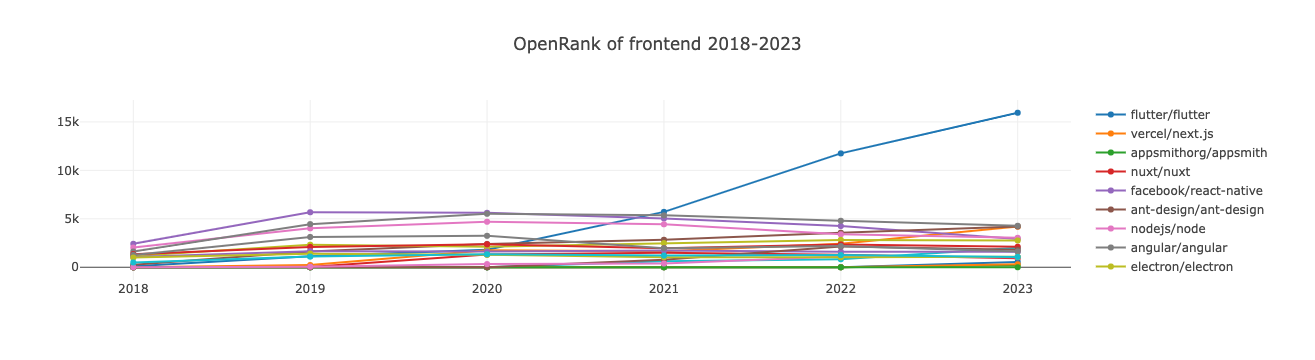

In [13]:
processTechFieldData(':technology/frontend', 'frontend');

### 人工智能

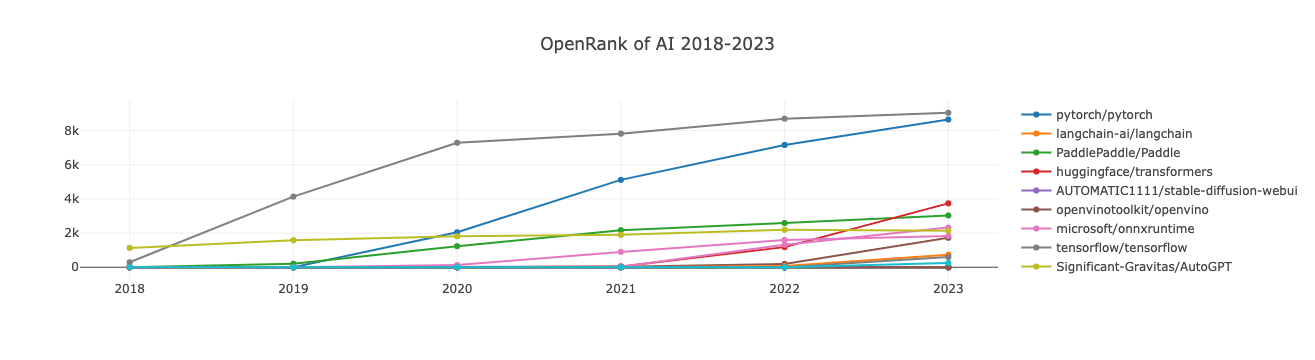

In [14]:
processTechFieldData(':technology/ai', 'AI');

## 技术领域各子领域近6年变化趋势

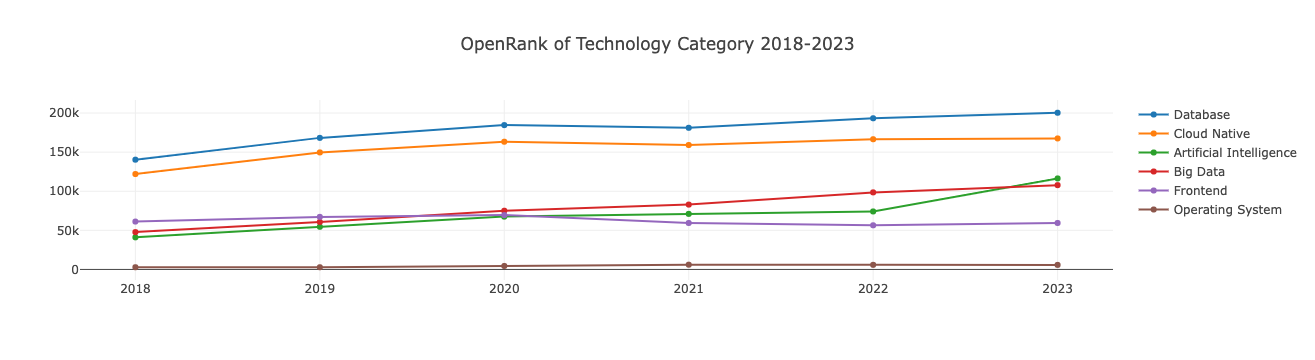

In [15]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':technology'],
    startYear: 2018, endYear: 2023, endMonth: 12,
    groupBy: 'Tech-4',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':technology'));
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of Technology Category 2018-2023`, xaxis: { type: 'category' }});
})